In [1]:
cd ..

/home/astro/phrdhx/automated_exocomet_hunt


In [2]:
from analysis_tools_cython import *

In [17]:
table,_=import_XRPlightcurve('betapic/tesslcs_sector_6_104_2_min_cadence_targets_tesslc_270577175.pkl',sector=6,clip=4, drop_bad_points=False)

In [20]:
table

time,raw flux,corrected flux,PCA flux,flux error,quality
float64,float64,float64,float64,float64,int32
1469.0125148958496,347161.4921875,347159.51928986365,347257.51836509426,16.086396368743504,0
1469.033348205488,347138.15625,347130.80441512656,347233.69674245414,16.0858834308829,0
1469.05418151656,347137.9453125,347154.0474762639,347237.91987667594,16.086005323284652,0
1469.075014829015,347115.9453125,347137.66357271076,347224.79454237444,16.08544494260152,0
1469.0958481427742,347092.8984375,347135.54636229546,347198.3862718676,16.084751257711787,0
1469.1166814577352,347085.109375,347122.48446406104,347188.17678715877,16.084545873813063,0
1469.1375147737685,347078.0546875,347115.2081440332,347179.6375294337,16.08437582534423,0
1469.1583480907243,347062.7890625,347119.95822593133,347193.874734803,16.08402671044064,0
1469.1791814084336,347063.40625,347110.70301108615,347171.5797639444,16.084105451692125,0


In [21]:
from astropy.table import unique

In [22]:
unique(table,keys='quality')

time,raw flux,corrected flux,PCA flux,flux error,quality
float64,float64,float64,float64,float64,int32
1469.0125148958496,347161.4921875,347159.51928986365,347257.51836509426,16.086396368743504,0
1469.3250146366631,347009.7890625,347043.6325960738,347136.6741403208,16.082923343683778,4096
1471.700010107689,346899.203125,347069.55329667364,347039.16784235585,16.080735360786594,8192
1471.5333439097126,346907.34375,347089.35520181863,347011.2598491735,16.080502407518946,8320
1471.5125106277567,346922.1171875,308044.8395765959,307987.09446778125,15.152018980954939,8356
1472.1375088946793,346905.890625,347081.44201995654,347034.7448228531,16.08121145742685,12416
1474.637500883567,346940.6328125,309396.38672819966,309385.64698206505,15.186526671566195,12452


---

## Kepler

In [7]:
table2 = import_lightcurve('kepler/kplr003542116-2012277125453_llc.fits',drop_bad_points=True)

{0, 16384, 128, 8192, 4, 12288, 8320, 132, 32768, 98304, 8196, 98312, 8, 4096, 16, 144, 32784, 20, 8212, 32800, 32816, 8256}


In [8]:
unique(table2,keys='SAP_QUALITY')

TIME,PDCSAP_FLUX,SAP_QUALITY
float64,float32,int32
1274.1606545110699,1409187.4,0
1278.1657784524868,1409262.4,16


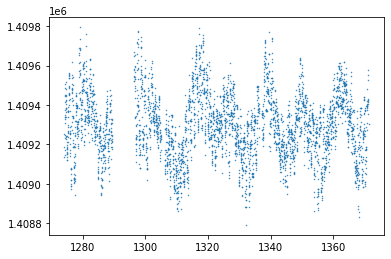

In [9]:
plt.scatter(table2['TIME'],table2['PDCSAP_FLUX'],s=0.2)

Conclusions: 
- Kepler flags I am not sure what the order is.
- This link suggests `ok_flags=[5]` should actually be `[2]` [Kepler quality flags](https://docs.lightkurve.org/tutorials/2-creating-light-curves/2-2-kepler-noise-1-data-gaps-and-quality-flags.html).
- For TESS, ok_flags works for flag+1